In [163]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,classification_report

#optimize

from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler

from imblearn.over_sampling import SMOTE
from collections import Counter

from sklearn.ensemble import BaggingClassifier

from sklearn.ensemble import RandomForestClassifier



In [ ]:
# decision trees

In [2]:
df=pd.read_csv("Attrition.csv")

In [3]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [4]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [5]:
df.shape

(1470, 35)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   int64 
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [8]:
df["Attrition"]=df["Attrition"].apply(lambda x: 1 if x=="Yes" else 0)

In [9]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [11]:
df["BusinessTravel"].value_counts()

Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: BusinessTravel, dtype: int64

In [13]:
df["Department"].value_counts()

Research & Development    961
Sales                     446
Human Resources            63
Name: Department, dtype: int64

In [14]:
df["Attrition"].value_counts() #very imbalanced

0    1233
1     237
Name: Attrition, dtype: int64

In [16]:
df["EducationField"].value_counts()

Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: EducationField, dtype: int64

In [27]:
dum_bt=pd.get_dummies(df["BusinessTravel"],prefix="BusinessT_")

In [29]:
dummy_dept = pd.get_dummies(df['Department'], prefix='dept')
dummy_edufield = pd.get_dummies(df['EducationField'],prefix='edufield')
dummy_gender = pd.get_dummies(df['Gender'], prefix='gend')
dummy_jobrole = pd.get_dummies(df['JobRole'],prefix='jobrole')
dummy_maritstat = pd.get_dummies(df['MaritalStatus'],prefix='maritalstat')
dummy_overtime = pd.get_dummies(df['OverTime'],prefix='overtime')

In [31]:
continuous_columns = ['Age','DailyRate','DistanceFromHome',
'Education',
'EnvironmentSatisfaction','HourlyRate','JobInvolvement','JobLevel','JobSatisfaction', 'MonthlyIncome', 'MonthlyRate',
'NumCompaniesWorked','PercentSalaryHike', 'PerformanceRating',
'RelationshipSatisfaction','StockOptionLevel', 'TotalWorkingYears',
'TrainingTimesLastYear','WorkLifeBalance', 'YearsAtCompany',
'YearsInCurrentRole', 'YearsSinceLastPromotion','YearsWithCurrManager']

In [32]:
df_conti= df[continuous_columns]

In [35]:
df1=pd.concat([dum_bt,dummy_dept,dummy_edufield,dummy_gender,dummy_jobrole,dummy_maritstat,dummy_overtime,df_conti,df["Attrition"]],axis=1)

In [37]:
df1.head()

,BusinessT__Non-Travel,BusinessT__Travel_Frequently,BusinessT__Travel_Rarely,dept_Human Resources,dept_Research & Development,dept_Sales,edufield_Human Resources,edufield_Life Sciences,edufield_Marketing,edufield_Medical,...,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition
0,0,0,1,0,0,1,0,1,0,0,...,1,0,8,0,1,6,4,0,5,1
1,0,1,0,0,1,0,0,1,0,0,...,4,1,10,3,3,10,7,1,7,0
2,0,0,1,0,1,0,0,0,0,0,...,2,0,7,3,3,0,0,0,0,1
3,0,1,0,0,1,0,0,1,0,0,...,3,0,8,3,3,8,7,3,0,0
4,0,0,1,0,1,0,0,0,0,1,...,4,1,6,3,3,2,2,2,2,0


In [41]:
x_train,x_test,y_train,y_test=train_test_split(df1.drop("Attrition",axis=1),df1["Attrition"],train_size=0.7,random_state=42)

In [42]:
x_train.shape,x_test.shape

((1029, 51), (441, 51))

In [43]:
y_train.shape,y_test.shape

((1029,), (441,))

In [45]:
dt_fit=DecisionTreeClassifier(criterion="gini",max_depth=5,min_samples_split=2,min_samples_leaf=1,random_state=42)

In [46]:
dt_fit.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=5, random_state=42)

In [51]:
print("Train Confusion matrix \n\n",pd.crosstab(y_train,dt_fit.predict(x_train),rownames=["Actual"],colnames=["Predicted"]))

Train Confusion matrix 

 Predicted    0   1
Actual            
0          844   9
1           98  78


In [53]:
print("Decision tree train accuracy \n\n",round(accuracy_score(y_train,dt_fit.predict(x_train)),3))

Decision tree train accuracy 

 0.896


In [55]:
print("Classification report \n\n",classification_report(y_train,dt_fit.predict(x_train)))

Classification report 

               precision    recall  f1-score   support

           0       0.90      0.99      0.94       853
           1       0.90      0.44      0.59       176

    accuracy                           0.90      1029
   macro avg       0.90      0.72      0.77      1029
weighted avg       0.90      0.90      0.88      1029



In [58]:
print(" test confusion matrix \n\n",pd.crosstab(y_test,dt_fit.predict(x_test),rownames=["Actual"],colnames=["Predicted"]))

 test confusion matrix 

 Predicted    0   1
Actual            
0          361  19
1           49  12


In [62]:
print(" test accuracy",round(accuracy_score(y_test,dt_fit.predict(x_test)),3))

 test accuracy 0.846


In [64]:
print("test classification report \n\n",classification_report(y_test,dt_fit.predict(x_test)))

test classification report 

               precision    recall  f1-score   support

           0       0.88      0.95      0.91       380
           1       0.39      0.20      0.26        61

    accuracy                           0.85       441
   macro avg       0.63      0.57      0.59       441
weighted avg       0.81      0.85      0.82       441



In [74]:
f=classification_report(y_test,dt_fit.predict(x_test)).split()

In [79]:
f[5]

'0.88'

<b>Note:</b> By carefully observing the results we observe that :- <br>
<ul>
    <li>even though the test accuracy is high(84.6%), the precision and recall of one category (Attrition = Yes) is low (precision = 0.39 and recall = 0.20). </li><br>
    <li>This could be a serious issue when management tries to use this model to provide some extra benefits proactively to the employees with a high chance of attrition prior to actual attrition, as this model is unable to identify the real employees who will be leaving. </li></ul><br>
<b>Solution</b>
    <ul><li>Hence, we need to look for other modifications; one way is to control the model by using class weights. By utilizing class weights, we can increase the importance of a particular class at the cost of an increase in other errors.</li>
<br>
For example, by increasing class weight to category 1, we can identify more employees with
the characteristics of actual attrition, but by doing so, we will mark some of the nonpotential
churner employees as potential attriters (which should be acceptable).

### Tuning class weights in decision tree classifier

In [65]:
dummyarray=np.empty((6,10))

In [68]:
dummyarray

array([[4.94e-324, 4.94e-324, 4.94e-324, 4.94e-324, 4.94e-324, 4.94e-324,
        1.98e-323, 9.39e-323, 1.33e-322, 1.53e-322],
       [4.94e-324, 9.88e-324, 9.88e-324, 9.88e-324, 1.48e-323, 3.95e-322,
        3.95e-322, 3.95e-322, 3.95e-322, 3.95e-322],
       [0.00e+000, 0.00e+000, 0.00e+000, 0.00e+000, 0.00e+000, 3.95e-323,
        3.46e-323, 2.96e-323, 4.94e-323, 3.95e-323],
       [0.00e+000, 1.48e-323, 1.98e-323, 1.98e-323, 9.88e-324, 4.94e-324,
        1.48e-323, 1.48e-323, 1.48e-323, 1.48e-323],
       [2.96e-323, 0.00e+000, 1.98e-323, 2.47e-323, 1.98e-323, 1.98e-323,
        0.00e+000, 9.88e-324, 1.48e-323, 9.88e-324],
       [0.00e+000, 0.00e+000, 0.00e+000, 0.00e+000, 4.94e-324, 2.47e-323,
        0.00e+000, 1.48e-323, 1.48e-323, 1.48e-323]])

In [66]:
dt_wttune=pd.DataFrame(dummyarray)

In [67]:
dt_wttune

,0,1,2,3,4,5,6,7,8,9
0,4.940656e-324,4.940656e-324,4.940656e-324,4.940656e-324,4.940656e-324,4.940656e-324,1.976263e-323,9.387247e-323,1.333977e-322,1.531604e-322
1,4.940656e-324,9.881313e-324,9.881313e-324,9.881313e-324,1.482197e-323,3.952525e-322,3.952525e-322,3.952525e-322,3.952525e-322,3.952525e-322
2,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.952525e-323,3.458460e-323,2.964394e-323,4.940656e-323,3.952525e-323
3,0.000000e+00,1.482197e-323,1.976263e-323,1.976263e-323,9.881313e-324,4.940656e-324,1.482197e-323,1.482197e-323,1.482197e-323,1.482197e-323
4,2.964394e-323,0.000000e+00,1.976263e-323,2.470328e-323,1.976263e-323,1.976263e-323,0.000000e+00,9.881313e-324,1.482197e-323,9.881313e-324
5,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.940656e-324,2.470328e-323,0.000000e+00,1.482197e-323,1.482197e-323,1.482197e-323


In [69]:
dt_wttune.columns = ["zero_wght","one_wght","tr_accuracy",
"tst_accuracy", "prec_zero","prec_one", "prec_ovll",
"recl_zero","recl_one","recl_ovll"]

In [70]:
dt_wttune

,zero_wght,one_wght,tr_accuracy,tst_accuracy,prec_zero,prec_one,prec_ovll,recl_zero,recl_one,recl_ovll
0,4.940656e-324,4.940656e-324,4.940656e-324,4.940656e-324,4.940656e-324,4.940656e-324,1.976263e-323,9.387247e-323,1.333977e-322,1.531604e-322
1,4.940656e-324,9.881313e-324,9.881313e-324,9.881313e-324,1.482197e-323,3.952525e-322,3.952525e-322,3.952525e-322,3.952525e-322,3.952525e-322
2,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.952525e-323,3.458460e-323,2.964394e-323,4.940656e-323,3.952525e-323
3,0.000000e+00,1.482197e-323,1.976263e-323,1.976263e-323,9.881313e-324,4.940656e-324,1.482197e-323,1.482197e-323,1.482197e-323,1.482197e-323
4,2.964394e-323,0.000000e+00,1.976263e-323,2.470328e-323,1.976263e-323,1.976263e-323,0.000000e+00,9.881313e-324,1.482197e-323,9.881313e-324
5,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.940656e-324,2.470328e-323,0.000000e+00,1.482197e-323,1.482197e-323,1.482197e-323


In [81]:
zero_clwghts = [0.01,0.1,0.2,0.3,0.4,0.5]

In [86]:
for i in range(len(zero_clwghts)):
    clwght={0:zero_clwghts[i],1:1.0-zero_clwghts[i]}
    dt_fit=DecisionTreeClassifier(criterion="gini",max_depth=5,min_samples_split=2,min_samples_leaf=2,random_state=42,class_weight=clwght)
    dt_fit.fit(x_train,y_train)
    dt_wttune.loc[i,'zero_wght']=clwght[0]
    dt_wttune.loc[i,'one_wght']=clwght[1]
    dt_wttune.loc[i,'tr_accuracy']=round(accuracy_score(y_train,dt_fit.predict(x_train)),3)
    dt_wttune.loc[i,'tst_accuracy']=round(accuracy_score(y_test,dt_fit.predict(x_test)),3)
    clf_sp=classification_report(y_test,dt_fit.predict(x_test)).split()
    dt_wttune.loc[i,'prec_zero']=float(clf_sp[5])
    dt_wttune.loc[i,'prec_one']=float(clf_sp[10])
    dt_wttune.loc[i,'prec_ovll']=float(clf_sp[15])
    dt_wttune.loc[i,'recl_zero']=float(clf_sp[6])
    dt_wttune.loc[i,'recl_one']=float(clf_sp[11])
    dt_wttune.loc[i,'recl_ovll']=float(clf_sp[20])
    print ("\nClass Weights",clwght,"Trainaccuracy:",round(accuracy_score( y_train,dt_fit.predict(x_train)),3),"Test accuracy:",round(accuracy_score(y_test, dt_fit.predict(x_test)),3))
    print ("Test Confusion Matrix\n\n",pd.crosstab(y_test,dt_fit.predict( x_test),rownames =["Actuall"],colnames = ["Predicted"]))


Class Weights {0: 0.01, 1: 0.99} Trainaccuracy: 0.342 Test accuracy: 0.272
Test Confusion Matrix

 Predicted   0    1
Actuall           
0          65  315
1           6   55

Class Weights {0: 0.1, 1: 0.9} Trainaccuracy: 0.809 Test accuracy: 0.735
Test Confusion Matrix

 Predicted    0   1
Actuall           
0          283  97
1           20  41

Class Weights {0: 0.2, 1: 0.8} Trainaccuracy: 0.871 Test accuracy: 0.83
Test Confusion Matrix

 Predicted    0   1
Actuall           
0          341  39
1           36  25

Class Weights {0: 0.3, 1: 0.7} Trainaccuracy: 0.88 Test accuracy: 0.837
Test Confusion Matrix

 Predicted    0   1
Actuall           
0          344  36
1           36  25

Class Weights {0: 0.4, 1: 0.6} Trainaccuracy: 0.892 Test accuracy: 0.834
Test Confusion Matrix

 Predicted    0   1
Actuall           
0          347  33
1           40  21

Class Weights {0: 0.5, 1: 0.5} Trainaccuracy: 0.894 Test accuracy: 0.853
Test Confusion Matrix

 Predicted    0   1
Actuall      

In [141]:
dt_wttune.head()

,zero_wght,one_wght,tr_accuracy,tst_accuracy,prec_zero,prec_one,prec_ovll,recl_zero,recl_one,recl_ovll
0,0.01,0.99,0.342,0.272,0.92,0.15,0.27,0.17,0.90,0.54
1,0.10,0.90,0.809,0.735,0.93,0.30,0.73,0.74,0.67,0.71
2,0.20,0.80,0.871,0.830,0.90,0.39,0.83,0.90,0.41,0.65
3,0.30,0.70,0.880,0.837,0.91,0.41,0.84,0.91,0.41,0.66
4,0.40,0.60,0.892,0.834,0.90,0.39,0.83,0.91,0.34,0.63


 we can seen that at class weight values of 0.3 (for zero) and
0.7 (for one) it is identifying a higher number of attriters (25 out of 61) without
compromising test accuracy 83.9% using decision trees methodology

### Optimize DT parameters using gridsearch

In [92]:
# Creating an standardscaler object
std_slc = StandardScaler()
# Creating a pca object
pca = PCA()
 # Creating a DecisionTreeClassifie
dt = DecisionTreeClassifier()


In [93]:
 # Creating a pipeline of three steps. First, standardizing the data.
 # Second, tranforming the data with PCA.
 # Third, training a Decision Tree Classifier on the data.

pipe=Pipeline(steps=[('std_slc',std_slc),
                    ('pca',pca),
                    ('dt',dt)])
    

In [107]:
# Creating Parameter Space
# Creating a list of a sequence of integers from 1 to 30 (the number of features in X + 1)
n_components = list(range(1,x_train.shape[1]+1,1))
print(n_components)    

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51]


In [108]:
#Creating lists of parameter for Decision Tree Classifier
criterion = ['gini', 'entropy']
max_depth = [2,4,6,8,10,12]

In [109]:
# Creating a dictionary of all the parameter options 
# Note that we can access the parameters of steps of a pipeline by using '__’
parameters = dict(pca__n_components=n_components,
                  dt__criterion=criterion,
                  dt__max_depth=max_depth)

In [110]:
# Conducting Parameter Optmization With Pipeline
# Creating a grid search object
clf_GS = GridSearchCV(pipe, parameters)

In [111]:
clf_GS.fit(x_train, y_train)

GridSearchCV(estimator=Pipeline(steps=[('std_slc', StandardScaler()),
                                       ('pca', PCA()),
                                       ('dt', DecisionTreeClassifier())]),
             param_grid={'dt__criterion': ['gini', 'entropy'],
                         'dt__max_depth': [2, 4, 6, 8, 10, 12],
                         'pca__n_components': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10,
                                               11, 12, 13, 14, 15, 16, 17, 18,
                                               19, 20, 21, 22, 23, 24, 25, 26,
                                               27, 28, 29, 30, ...]})

In [112]:
print('Best Criterion:', clf_GS.best_estimator_.get_params()['dt__criterion'])
print('Best max_depth:', clf_GS.best_estimator_.get_params()['dt__max_depth'])
print('Best Number Of Components:', clf_GS.best_estimator_.get_params()['pca__n_components'])
print(clf_GS.best_estimator_.get_params()['dt'])


Best Criterion: entropy
Best max_depth: 4
Best Number Of Components: 21
DecisionTreeClassifier(criterion='entropy', max_depth=4)


In [113]:
dt=DecisionTreeClassifier(criterion="entropy",max_depth=4,min_samples_split=2,min_samples_leaf=1,random_state=42)

In [114]:
dt_fit.fit(x_train,y_train)

DecisionTreeClassifier(class_weight={0: 0.5, 1: 0.5}, max_depth=5,
                       min_samples_leaf=2, random_state=42)

In [115]:
print("Train Confusion matrix \n\n",pd.crosstab(y_train,dt_fit.predict(x_train),rownames=["Actual"],colnames=["Predicted"]))

Train Confusion matrix 

 Predicted    0   1
Actual            
0          844   9
1          100  76


In [116]:
print("Decision tree train accuracy \n\n",round(accuracy_score(y_train,dt_fit.predict(x_train)),3))

Decision tree train accuracy 

 0.894


In [117]:
print("Classification report \n\n",classification_report(y_train,dt_fit.predict(x_train)))

Classification report 

               precision    recall  f1-score   support

           0       0.89      0.99      0.94       853
           1       0.89      0.43      0.58       176

    accuracy                           0.89      1029
   macro avg       0.89      0.71      0.76      1029
weighted avg       0.89      0.89      0.88      1029



In [118]:
print(" test confusion matrix \n\n",pd.crosstab(y_test,dt_fit.predict(x_test),rownames=["Actual"],colnames=["Predicted"]))

 test confusion matrix 

 Predicted    0   1
Actual            
0          363  17
1           48  13


In [119]:
print(" test accuracy",round(accuracy_score(y_test,dt_fit.predict(x_test)),3))

 test accuracy 0.853


In [120]:
print("test classification report \n\n",classification_report(y_test,dt_fit.predict(x_test)))

test classification report 

               precision    recall  f1-score   support

           0       0.88      0.96      0.92       380
           1       0.43      0.21      0.29        61

    accuracy                           0.85       441
   macro avg       0.66      0.58      0.60       441
weighted avg       0.82      0.85      0.83       441



In [121]:
# Since it is an imbalanced data set lets deal with that and see the result

In [122]:
#pip install imblearn

Note: you may need to restart the kernel to use updated packages.Requirement already satisfied: imblearn in c:\users\gurdit\anaconda3\lib\site-packages (0.0)



In [124]:
smote=SMOTE()


In [125]:
x_train_smote,y_train_smote=smote.fit_sample(x_train,y_train)

In [128]:
print("Before SMOTE",Counter(y_train))
print("After SMOTE ",Counter(y_train_smote))

Before SMOTE Counter({0: 853, 1: 176})
After SMOTE  Counter({0: 853, 1: 853})


In [129]:
dt_fit=DecisionTreeClassifier(criterion="gini",max_depth=5, min_samples_split=2,min_samples_leaf=1,random_state=42)

In [132]:
dt_fit.fit(x_train_smote,y_train_smote)

DecisionTreeClassifier(max_depth=5, random_state=42)

In [133]:
print("train confusion matrix \n\n",pd.crosstab(y_train_smote,dt_fit.predict(x_train_smote),rownames=["Actual"],colnames=["Prediction"]))

train confusion matrix 

 Prediction    0    1
Actual              
0           766   87
1           129  724


In [135]:
print("train accuracy ",accuracy_score(y_train_smote,dt_fit.predict(x_train_smote)))

train accuracy  0.8733880422039859


In [136]:
print("train classification report",classification_report(y_train_smote,dt_fit.predict(x_train_smote)))

train classification report               precision    recall  f1-score   support

           0       0.86      0.90      0.88       853
           1       0.89      0.85      0.87       853

    accuracy                           0.87      1706
   macro avg       0.87      0.87      0.87      1706
weighted avg       0.87      0.87      0.87      1706



In [142]:
def testit(x,y):
    print("test confusion matrix \n\n",pd.crosstab(y,dt_fit.predict(x),rownames=["Actual"],colnames=["Prediction"]),"\n")
    print("test accuracy \n ",accuracy_score(y,dt_fit.predict(x)),"\n")
    print("test classification report \n",classification_report(y,dt_fit.predict(x)),"\n")

In [143]:
testit(x_test,y_test)

test confusion matrix 

 Prediction    0   1
Actual             
0           331  49
1            38  23 

test accuracy 
  0.8027210884353742 

test classification report 
               precision    recall  f1-score   support

           0       0.90      0.87      0.88       380
           1       0.32      0.38      0.35        61

    accuracy                           0.80       441
   macro avg       0.61      0.62      0.61       441
weighted avg       0.82      0.80      0.81       441
 



In [144]:
clf_GS.fit(x_train_smote, y_train_smote)

GridSearchCV(estimator=Pipeline(steps=[('std_slc', StandardScaler()),
                                       ('pca', PCA()),
                                       ('dt', DecisionTreeClassifier())]),
             param_grid={'dt__criterion': ['gini', 'entropy'],
                         'dt__max_depth': [2, 4, 6, 8, 10, 12],
                         'pca__n_components': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10,
                                               11, 12, 13, 14, 15, 16, 17, 18,
                                               19, 20, 21, 22, 23, 24, 25, 26,
                                               27, 28, 29, 30, ...]})

In [145]:
print('Best Criterion:', clf_GS.best_estimator_.get_params()['dt__criterion'])
print('Best max_depth:', clf_GS.best_estimator_.get_params()['dt__max_depth'])
print('Best Number Of Components:', clf_GS.best_estimator_.get_params()['pca__n_components'])
print(clf_GS.best_estimator_.get_params()['dt'])


Best Criterion: gini
Best max_depth: 6
Best Number Of Components: 12
DecisionTreeClassifier(max_depth=6)


In [146]:
dt_fit=DecisionTreeClassifier(criterion="gini",max_depth=6, min_samples_split=2,min_samples_leaf=1,random_state=42)

In [147]:
dt_fit.fit(x_train_smote,y_train_smote)

DecisionTreeClassifier(max_depth=6, random_state=42)

In [148]:
testit(x_train_smote,y_train_smote)

test confusion matrix 

 Prediction    0    1
Actual              
0           773   80
1            82  771 

test accuracy 
  0.9050410316529894 

test classification report 
               precision    recall  f1-score   support

           0       0.90      0.91      0.91       853
           1       0.91      0.90      0.90       853

    accuracy                           0.91      1706
   macro avg       0.91      0.91      0.91      1706
weighted avg       0.91      0.91      0.91      1706
 



In [149]:
testit(x_test,y_test)

test confusion matrix 

 Prediction    0   1
Actual             
0           332  48
1            33  28 

test accuracy 
  0.8163265306122449 

test classification report 
               precision    recall  f1-score   support

           0       0.91      0.87      0.89       380
           1       0.37      0.46      0.41        61

    accuracy                           0.82       441
   macro avg       0.64      0.67      0.65       441
weighted avg       0.83      0.82      0.82       441
 



In [150]:
# Bagging Classifier

In [153]:
dt_fit = DecisionTreeClassifier(criterion="gini",max_depth=5,min_samples_split=2,min_samples_leaf=1,random_state=42,class_weight = {0:0.3,1:0.7})

note:Parameters used in bagging are, n_estimators to represent the number of individual
decision trees used as 5,000, maximum samples and features selected are 0.67 and 1.0
respectively, which means it will select 2/3rd of observations for each tree and all the
features.

In [155]:
bag_fit=BaggingClassifier(base_estimator=dt_fit,n_estimators=5000,max_samples=0.67,max_features=1.0,bootstrap=True,bootstrap_features=False,n_jobs=1,random_state=42)

In [156]:
bag_fit.fit(x_train_smote,y_train_smote)

BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight={0: 0.3,
                                                                      1: 0.7},
                                                        max_depth=5,
                                                        random_state=42),
                  max_samples=0.67, n_estimators=5000, n_jobs=1,
                  random_state=42)

In [159]:
def bagfitest(x,y,w):
    if w=="test":
        print("test confusion matrix \n\n",pd.crosstab(y,bag_fit.predict(x),rownames=["Actual"],colnames=["Prediction"]),"\n")
        print("test accuracy \n ",accuracy_score(y,bag_fit.predict(x)),"\n")
        print("test classification report \n",classification_report(y,bag_fit.predict(x)),"\n")
    elif w=="train":
        print("train confusion matrix \n\n",pd.crosstab(y,bag_fit.predict(x),rownames=["Actual"],colnames=["Prediction"]),"\n")
        print("train accuracy \n ",accuracy_score(y,bag_fit.predict(x)),"\n")
        print("train classification report \n",classification_report(y,bag_fit.predict(x)),"\n")

In [160]:
bagfitest(x_train_smote,y_train_smote,"train")

train confusion matrix 

 Prediction    0    1
Actual              
0           741  112
1            40  813 

train accuracy 
  0.9109026963657679 

train classification report 
               precision    recall  f1-score   support

           0       0.95      0.87      0.91       853
           1       0.88      0.95      0.91       853

    accuracy                           0.91      1706
   macro avg       0.91      0.91      0.91      1706
weighted avg       0.91      0.91      0.91      1706
 



In [161]:
bagfitest(x_test,y_test,"test")

test confusion matrix 

 Prediction    0   1
Actual             
0           317  63
1            31  30 

test accuracy 
  0.7868480725623582 

test classification report 
               precision    recall  f1-score   support

           0       0.91      0.83      0.87       380
           1       0.32      0.49      0.39        61

    accuracy                           0.79       441
   macro avg       0.62      0.66      0.63       441
weighted avg       0.83      0.79      0.80       441
 



In [162]:
# Random forrest

<b>note</b> : Random forests provide an improvement over bagging by doing a small tweak that utilizes
de-correlated trees. In bagging, we build a number of decision trees on bootstrapped
samples from training data, but the one big drawback with the bagging technique is that it
selects all the variables. By doing so, in each decision tree, order of candidate/variable
chosen to split remains more or less the same for all the individual trees, which look
correlated with each other. Variance reduction on correlated individual entities does not
work effectively while aggregating them.

In random forest, during bootstrapping (repeated sampling with replacement), samples
were drawn from training data; not just simply the second and third observations randomly
selected, similar to bagging, but it also selects the few predictors/columns out of all
predictors (m predictors out of total p predictors).

The parameters used in random forest are: n_estimators representing the number of
individual decision trees used is 5000, maximum features selected are auto, which means it
will select sqrt(p) for classification and p/3 for regression automatically. Here is the
straightforward classification problem though. Minimum samples per leaf provides the
minimum number of observations required in the terminal node:

In [165]:
rf_fit=RandomForestClassifier(n_estimators=5000,criterion="gini",max_depth=5,min_samples_split=2,bootstrap=True,max_features="auto",random_state=42,min_samples_leaf=1,class_weight={0:0.3,1:0.7})

In [166]:
rf_fit.fit(x_train_smote,y_train_smote)

RandomForestClassifier(class_weight={0: 0.3, 1: 0.7}, max_depth=5,
                       n_estimators=5000, random_state=42)

In [170]:
def rantest(x,y,w):
    if w=="test":
        print("test confusion matrix \n\n",pd.crosstab(y,rf_fit.predict(x),rownames=["Actual"],colnames=["Prediction"]),"\n")
        print("test accuracy \n ",accuracy_score(y,rf_fit.predict(x)),"\n")
        print("test classification report \n",classification_report(y,rf_fit.predict(x)),"\n")
    elif w=="train":
        print("train confusion matrix \n\n",pd.crosstab(y,rf_fit.predict(x),rownames=["Actual"],colnames=["Prediction"]),"\n")
        print("train accuracy \n ",accuracy_score(y,rf_fit.predict(x)),"\n")
        print("train classification report \n",classification_report(y,rf_fit.predict(x)),"\n")

In [171]:
rantest(x_train_smote,y_train_smote,"train")

train confusion matrix 

 Prediction    0    1
Actual              
0           689  164
1            21  832 

train accuracy 
  0.891559202813599 

train classification report 
               precision    recall  f1-score   support

           0       0.97      0.81      0.88       853
           1       0.84      0.98      0.90       853

    accuracy                           0.89      1706
   macro avg       0.90      0.89      0.89      1706
weighted avg       0.90      0.89      0.89      1706
 



In [172]:
rantest(x_test,y_test,"test")

test confusion matrix 

 Prediction    0   1
Actual             
0           287  93
1            27  34 

test accuracy 
  0.7278911564625851 

test classification report 
               precision    recall  f1-score   support

           0       0.91      0.76      0.83       380
           1       0.27      0.56      0.36        61

    accuracy                           0.73       441
   macro avg       0.59      0.66      0.59       441
weighted avg       0.82      0.73      0.76       441
 



In [186]:
model_ranks=pd.Series(rf_fit.feature_importances_,index=x_train_smote.columns,name="Importance").sort_values(ascending=False,inplace=False)

In [187]:
model_ranks

overtime_No                          0.175030
StockOptionLevel                     0.079367
maritalstat_Divorced                 0.070656
JobSatisfaction                      0.051405
MonthlyIncome                        0.042518
edufield_Life Sciences               0.041415
maritalstat_Married                  0.040639
JobLevel                             0.040191
TotalWorkingYears                    0.030973
dept_Research & Development          0.030839
JobInvolvement                       0.029314
YearsInCurrentRole                   0.027898
YearsAtCompany                       0.024484
edufield_Medical                     0.023965
Age                                  0.023413
EnvironmentSatisfaction              0.023166
YearsWithCurrManager                 0.021046
gend_Female                          0.019287
DailyRate                            0.013454
RelationshipSatisfaction             0.012850
HourlyRate                           0.012477
WorkLifeBalance                   

In [188]:
model_ranks.index.name="Variables"

In [189]:
model_ranks

Variables
overtime_No                          0.175030
StockOptionLevel                     0.079367
maritalstat_Divorced                 0.070656
JobSatisfaction                      0.051405
MonthlyIncome                        0.042518
edufield_Life Sciences               0.041415
maritalstat_Married                  0.040639
JobLevel                             0.040191
TotalWorkingYears                    0.030973
dept_Research & Development          0.030839
JobInvolvement                       0.029314
YearsInCurrentRole                   0.027898
YearsAtCompany                       0.024484
edufield_Medical                     0.023965
Age                                  0.023413
EnvironmentSatisfaction              0.023166
YearsWithCurrManager                 0.021046
gend_Female                          0.019287
DailyRate                            0.013454
RelationshipSatisfaction             0.012850
HourlyRate                           0.012477
WorkLifeBalance         

In [175]:
rf_fit.feature_importances_

array([0.00969867, 0.00152233, 0.00680606, 0.00146664, 0.03083884,
       0.00482472, 0.0007309 , 0.04141517, 0.00167179, 0.02396455,
       0.0021683 , 0.00125675, 0.01928735, 0.00507585, 0.00750847,
       0.00104047, 0.00243208, 0.00314254, 0.01036142, 0.00349639,
       0.00506869, 0.00343858, 0.00073542, 0.07065553, 0.04063871,
       0.00371517, 0.17503016, 0.00893651, 0.02341294, 0.01345447,
       0.01085196, 0.01092381, 0.02316617, 0.01247662, 0.02931358,
       0.04019056, 0.05140451, 0.04251777, 0.01204989, 0.00692253,
       0.00644845, 0.00575302, 0.01284984, 0.07936686, 0.03097256,
       0.00959072, 0.01230603, 0.02448353, 0.02789817, 0.00567166,
       0.02104632])

In [192]:
top_features=model_ranks.iloc[:31].sort_values(ascending=True,inplace=False)

In [193]:
top_features

Variables
NumCompaniesWorked                   0.006923
jobrole_Healthcare Representative    0.007508
overtime_Yes                         0.008937
TrainingTimesLastYear                0.009591
BusinessT__Non-Travel                0.009699
jobrole_Manufacturing Director       0.010361
DistanceFromHome                     0.010852
Education                            0.010924
MonthlyRate                          0.012050
WorkLifeBalance                      0.012306
HourlyRate                           0.012477
RelationshipSatisfaction             0.012850
DailyRate                            0.013454
gend_Female                          0.019287
YearsWithCurrManager                 0.021046
EnvironmentSatisfaction              0.023166
Age                                  0.023413
edufield_Medical                     0.023965
YearsAtCompany                       0.024484
YearsInCurrentRole                   0.027898
JobInvolvement                       0.029314
dept_Research & Developm

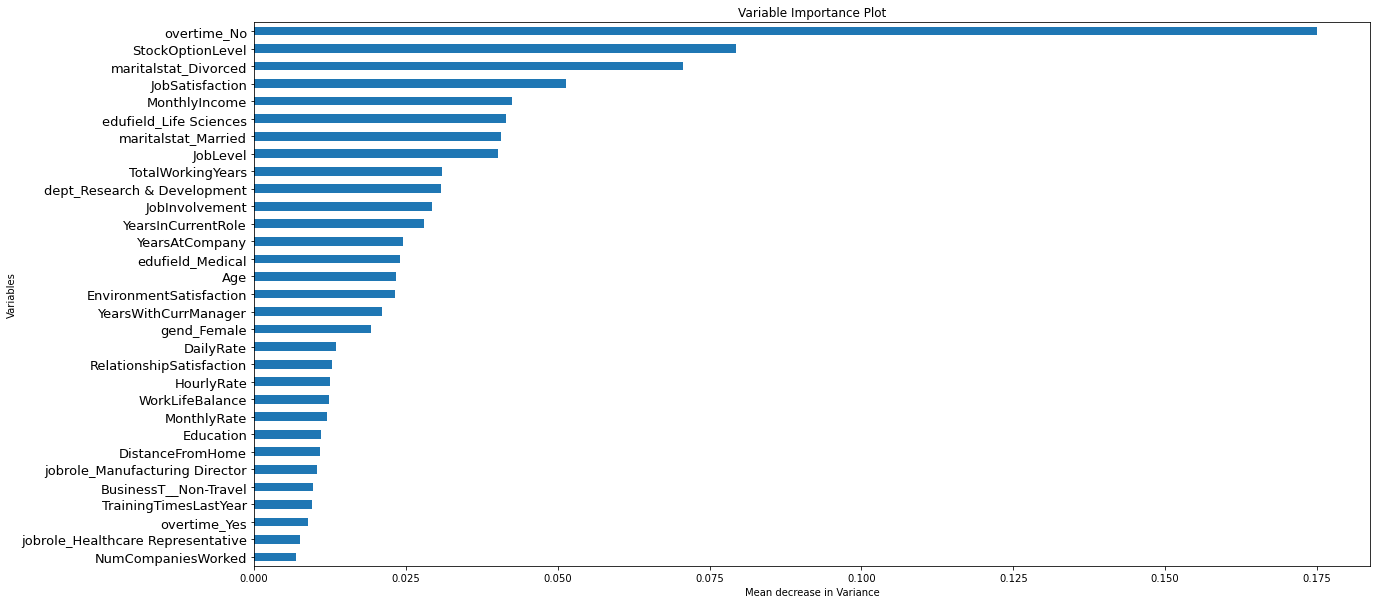

In [194]:
plt.figure(figsize=(20,10))
ax = top_features.plot(kind='barh')
_ = ax.set_title("Variable Importance Plot")
_ = ax.set_xlabel('Mean decrease in Variance')
_ = ax.set_yticklabels(top_features.index, fontsize=13)

### This provides us with some insight into what are major contributing factors that determine whether the employee will remain with the company or leave theorganization.

In [197]:
# without smote
rr=RandomForestClassifier(n_estimators=5000,criterion="gini",max_depth=5,min_samples_split=2,bootstrap=True,max_features="auto",random_state=42,min_samples_leaf=1,class_weight={0:0.3,1:0.7})

In [198]:
rr.fit(x_train,y_train)

RandomForestClassifier(class_weight={0: 0.3, 1: 0.7}, max_depth=5,
                       n_estimators=5000, random_state=42)

In [202]:
model_ranks_nosmote=pd.Series(rr.feature_importances_,index=x_train.columns,name="Importance").sort_values(ascending=False,inplace=False)

In [203]:
model_ranks_nosmote.index.name="variables"

In [204]:
tf=model_ranks_nosmote.iloc[:31].sort_values(ascending=True,inplace=False)

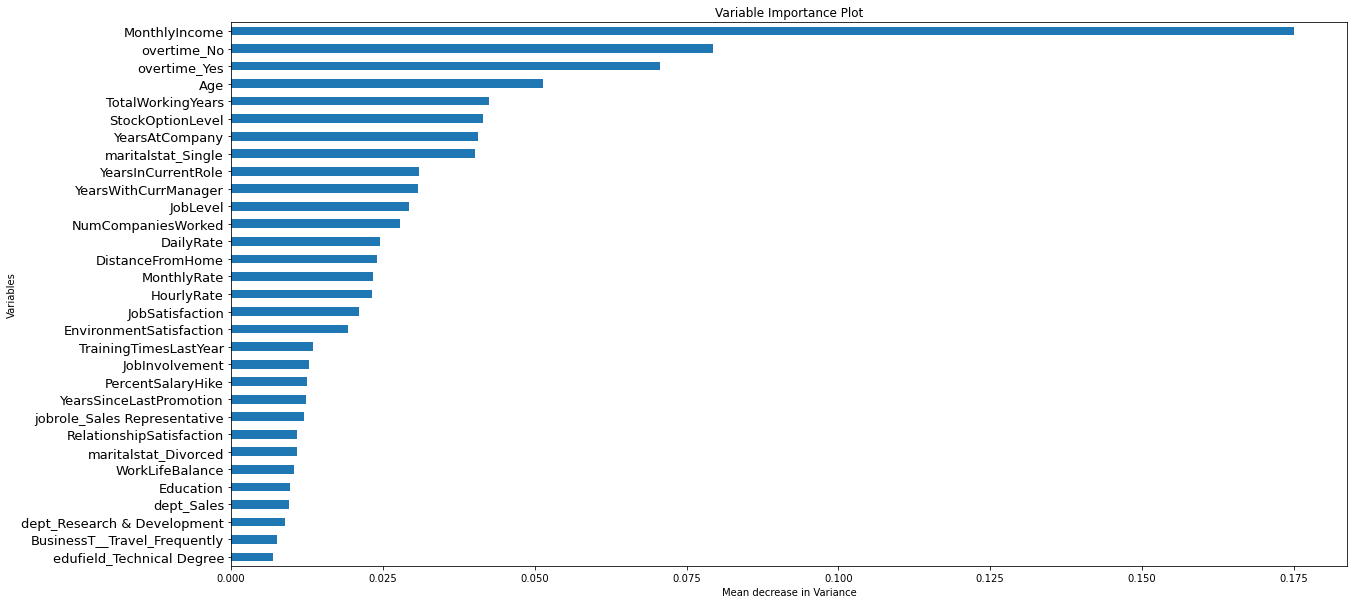

In [205]:
plt.figure(figsize=(20,10))
ax = top_features.plot(kind='barh')
_ = ax.set_title("Variable Importance Plot")
_ = ax.set_xlabel('Mean decrease in Variance')
_ = ax.set_yticklabels(tf.index, fontsize=13)

In [206]:
# grid search Random Forrest

In [207]:
pipeline=Pipeline([('clf',RandomForestClassifier(criterion="gini",class_weight={0:0.3,1:0.7}))])

In [208]:
parameters={'clf__n_estimators':(2000,3000,5000),
            'clf__max_depth':(5,15,30),
            'clf__min_samples_split':(2,3),
            'clf__min_samples_leaf':(1,2)}
                

In [209]:
grid_search=GridSearchCV(pipeline,parameters,n_jobs=-1,cv=5,verbose=1,scoring="accuracy")

In [210]:
grid_search.fit(x_train_smote,y_train_smote)

Fitting 5 folds for each of 36 candidates, totalling 180 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  3.6min
[Parallel(n_jobs=-1)]: Done 180 out of 180 | elapsed: 15.6min finished


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('clf',
                                        RandomForestClassifier(class_weight={0: 0.3,
                                                                             1: 0.7}))]),
             n_jobs=-1,
             param_grid={'clf__max_depth': (5, 15, 30),
                         'clf__min_samples_leaf': (1, 2),
                         'clf__min_samples_split': (2, 3),
                         'clf__n_estimators': (2000, 3000, 5000)},
             scoring='accuracy', verbose=1)

In [212]:
print ('Best Training score: %0.3f' % grid_search.best_score_)
print ('Best parameters set:')
best_parameters = grid_search.best_estimator_.get_params()

for param_name in sorted(parameters.keys()):
    print ('\t%s: %r' % (param_name, best_parameters[param_name]))

Best Training score: 0.908
Best parameters set:
	clf__max_depth: 15
	clf__min_samples_leaf: 1
	clf__min_samples_split: 2
	clf__n_estimators: 5000


In [213]:
predictions = grid_search.predict(x_test)

In [215]:
print ("Testing accuracy:",round(accuracy_score(y_test,predictions),4))
print ("\nComplete report of Testingdata\n",classification_report(y_test, predictions))

Testing accuracy: 0.8776

Complete report of Testingdata
               precision    recall  f1-score   support

           0       0.88      0.99      0.93       380
           1       0.71      0.20      0.31        61

    accuracy                           0.88       441
   macro avg       0.80      0.59      0.62       441
weighted avg       0.86      0.88      0.85       441



In [217]:
print ("\n\nRandom Forest Grid Search- Test Confusion Matrix\n\n",pd.crosstab( y_test, predictions,rownames =["Actuall"],colnames = ["Predicted"]))



Random Forest Grid Search- Test Confusion Matrix

 Predicted    0   1
Actuall           
0          375   5
1           49  12
